In [7]:
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [10]:
wine = load_wine()

In [13]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [5]:
import pandas as pd
pd.concat([pd.DataFrame(wine.data),pd.DataFrame(wine.target)],axis=1)#拼接函数

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [6]:
wine.feature_names #特征的名字

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [7]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [15]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(wine.data,wine.target,test_size = 0.3) #前面顺序不要错，0.3是指测试数据占30%

In [9]:
Xtrain.shape

(124, 13)

In [10]:
Xtest.shape

(54, 13)

In [11]:
Ytrain

array([2, 0, 1, 0, 1, 1, 0, 1, 0, 2, 0, 1, 0, 2, 0, 1, 2, 0, 1, 2, 0, 0,
       0, 0, 2, 1, 1, 1, 1, 2, 2, 0, 2, 1, 1, 2, 1, 2, 0, 2, 1, 1, 2, 1,
       0, 0, 1, 2, 1, 0, 0, 2, 2, 1, 1, 1, 2, 2, 0, 1, 0, 2, 1, 1, 0, 2,
       1, 1, 1, 2, 1, 0, 2, 1, 1, 0, 0, 1, 1, 0, 2, 0, 1, 2, 0, 1, 0, 0,
       1, 2, 1, 1, 1, 0, 0, 0, 1, 1, 1, 2, 0, 1, 0, 1, 1, 0, 1, 0, 2, 0,
       2, 1, 1, 2, 2, 0, 1, 1, 2, 0, 0, 2, 2, 0])

In [18]:
clf = tree.DecisionTreeClassifier(criterion="entropy"
                                 ,random_state=0
                                 ,splitter="random"
                                 ) #实例化
clf = clf.fit(Xtrain,Ytrain) #训练
score = clf.score(Xtest,Ytest) #返回预测的准确度accuracy
score

0.8888888888888888

0.8518518518518519

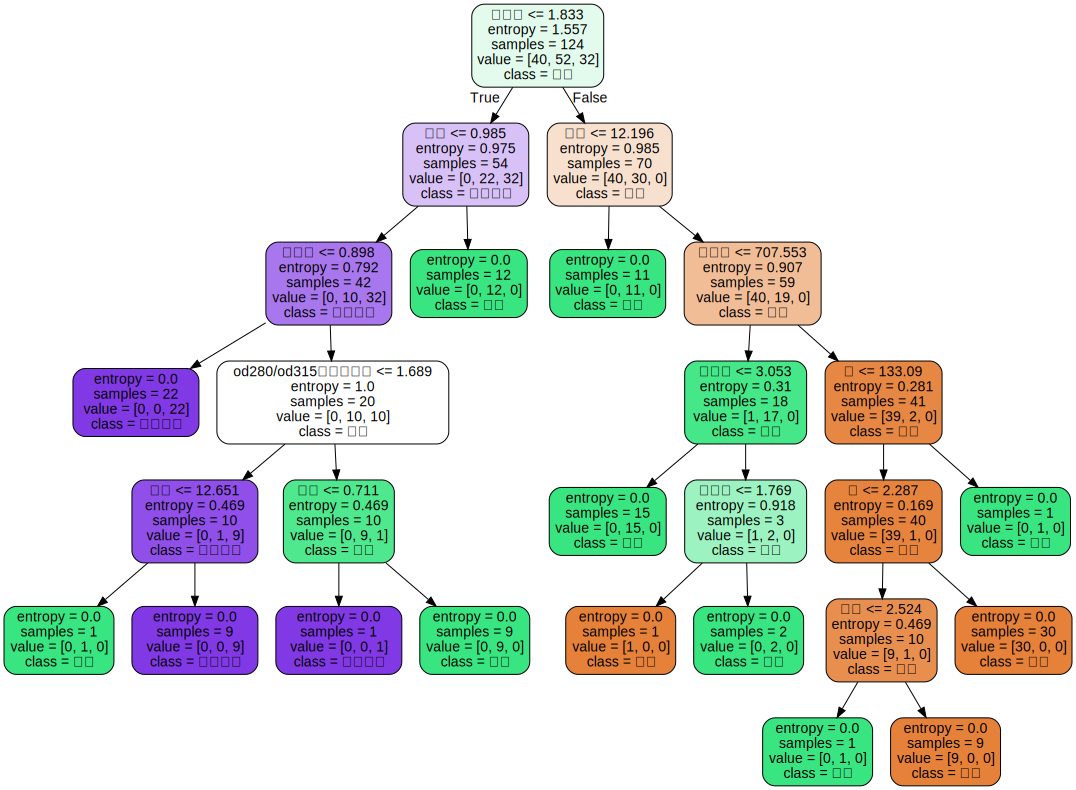

In [19]:
feature_name = ['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜色强度','色调','od280/od315稀释葡萄酒','脯氨酸']

import graphviz
dot_data = tree.export_graphviz(clf
                                ,feature_names = feature_name
                                ,class_names = ["琴酒","雪莉","贝尔摩德"]
                                ,filled = True
                                ,rounded = True
                                )
graph = graphviz.Source(dot_data)
graph


In [9]:
wine


{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1